In [1]:
import pandas as pd
from kaggle_data import load_dataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors, KernelDensity
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#%matplotlib widget 
  
# importing required libraries 
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
df = load_dataset()
df = df[['id', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df.set_index('id', inplace=True)

In [ ]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
0gNNToCW3qjabgTyBSjt3H,0.600,0.540,9,-11.803,1,0.0328,0.52500,0.00305,0.1000,0.5470,125.898
0tMgFpOrXZR6irEOLNWwJL,0.368,0.480,8,-11.605,1,0.0306,0.22800,0.70700,0.1590,0.3380,150.166
2ZywW3VyVx6rrlrX75n3JB,0.272,0.684,8,-9.728,1,0.0505,0.09980,0.01450,0.9460,0.2790,143.079
6DdWA7D1o5TU2kXWyCLcch,0.371,0.545,8,-9.315,1,0.0307,0.18500,0.58200,0.1830,0.3100,150.316
3vMmwsAiLDCfyc1jl76lQE,0.371,0.545,8,-9.315,1,0.0307,0.18500,0.58200,0.1830,0.3100,150.316
...,...,...,...,...,...,...,...,...,...,...,...
0cvfSKcm9VeduwyYPrxtLx,0.601,0.801,11,-5.174,1,0.0323,0.00678,0.00000,0.0991,0.2890,131.049
43MP9F7UzvfilSrw2SqZGJ,0.387,0.249,9,-13.233,1,0.0437,0.91800,0.00000,0.1030,0.3460,94.039
4TWlUuFk81NGUNKwndyS5Q,0.717,0.532,8,-8.351,0,0.2060,0.33000,0.00000,0.0997,0.5460,156.977


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#ax = Axes3D(fig) 
reduced_df = df.sample(1000, random_state=42)


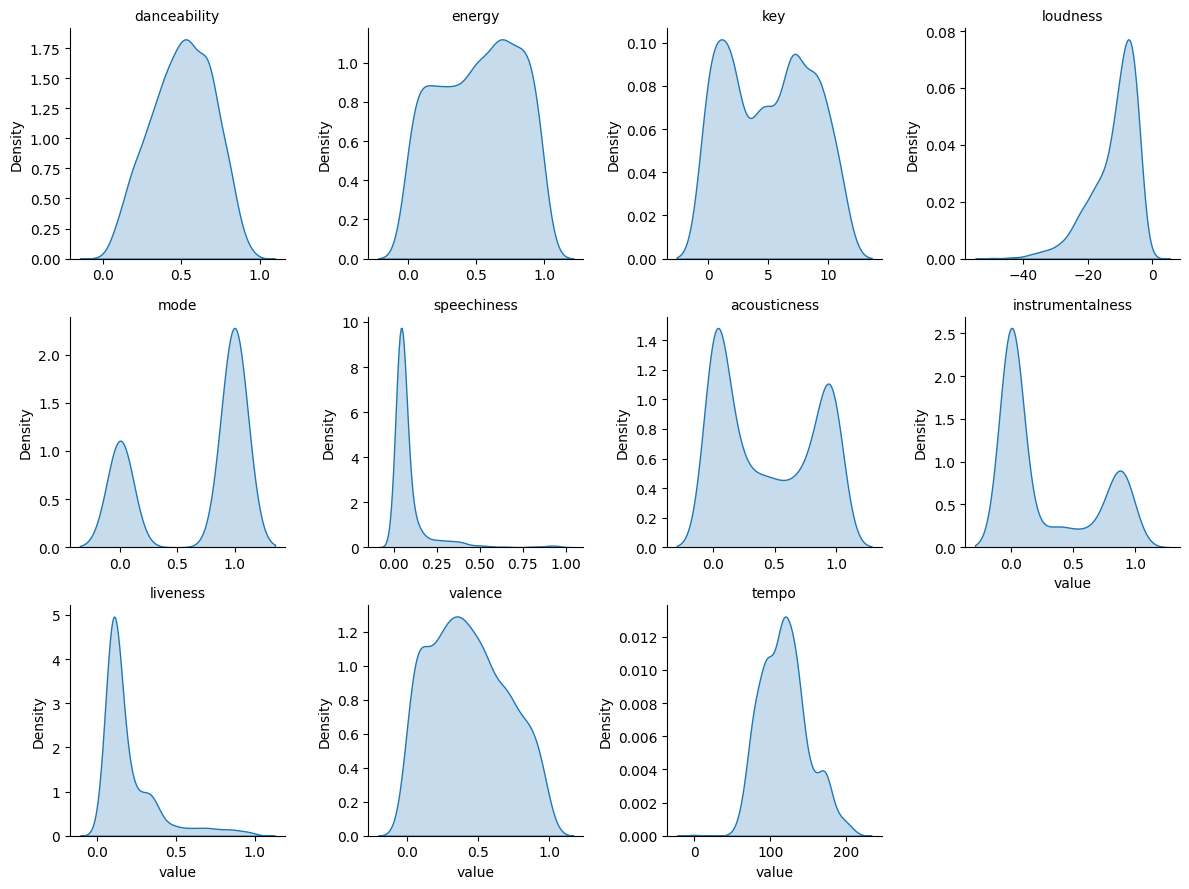

In [ ]:
# Plot KDE and boxplot for each feature in reduced_df in a single grid of plots
g = sns.FacetGrid(pd.melt(reduced_df), col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "value", fill=True)
g.set_titles("{col_name}")
plt.show()


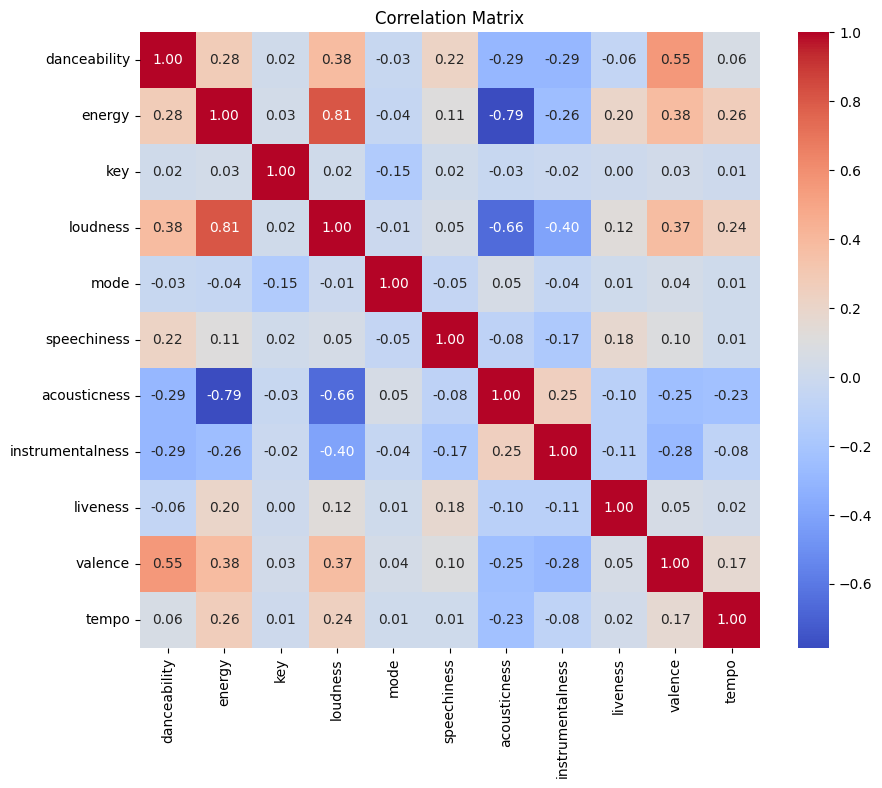

In [3]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Fit PCA on the reduced_df
pca = PCA()
pca.fit(reduced_df)
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

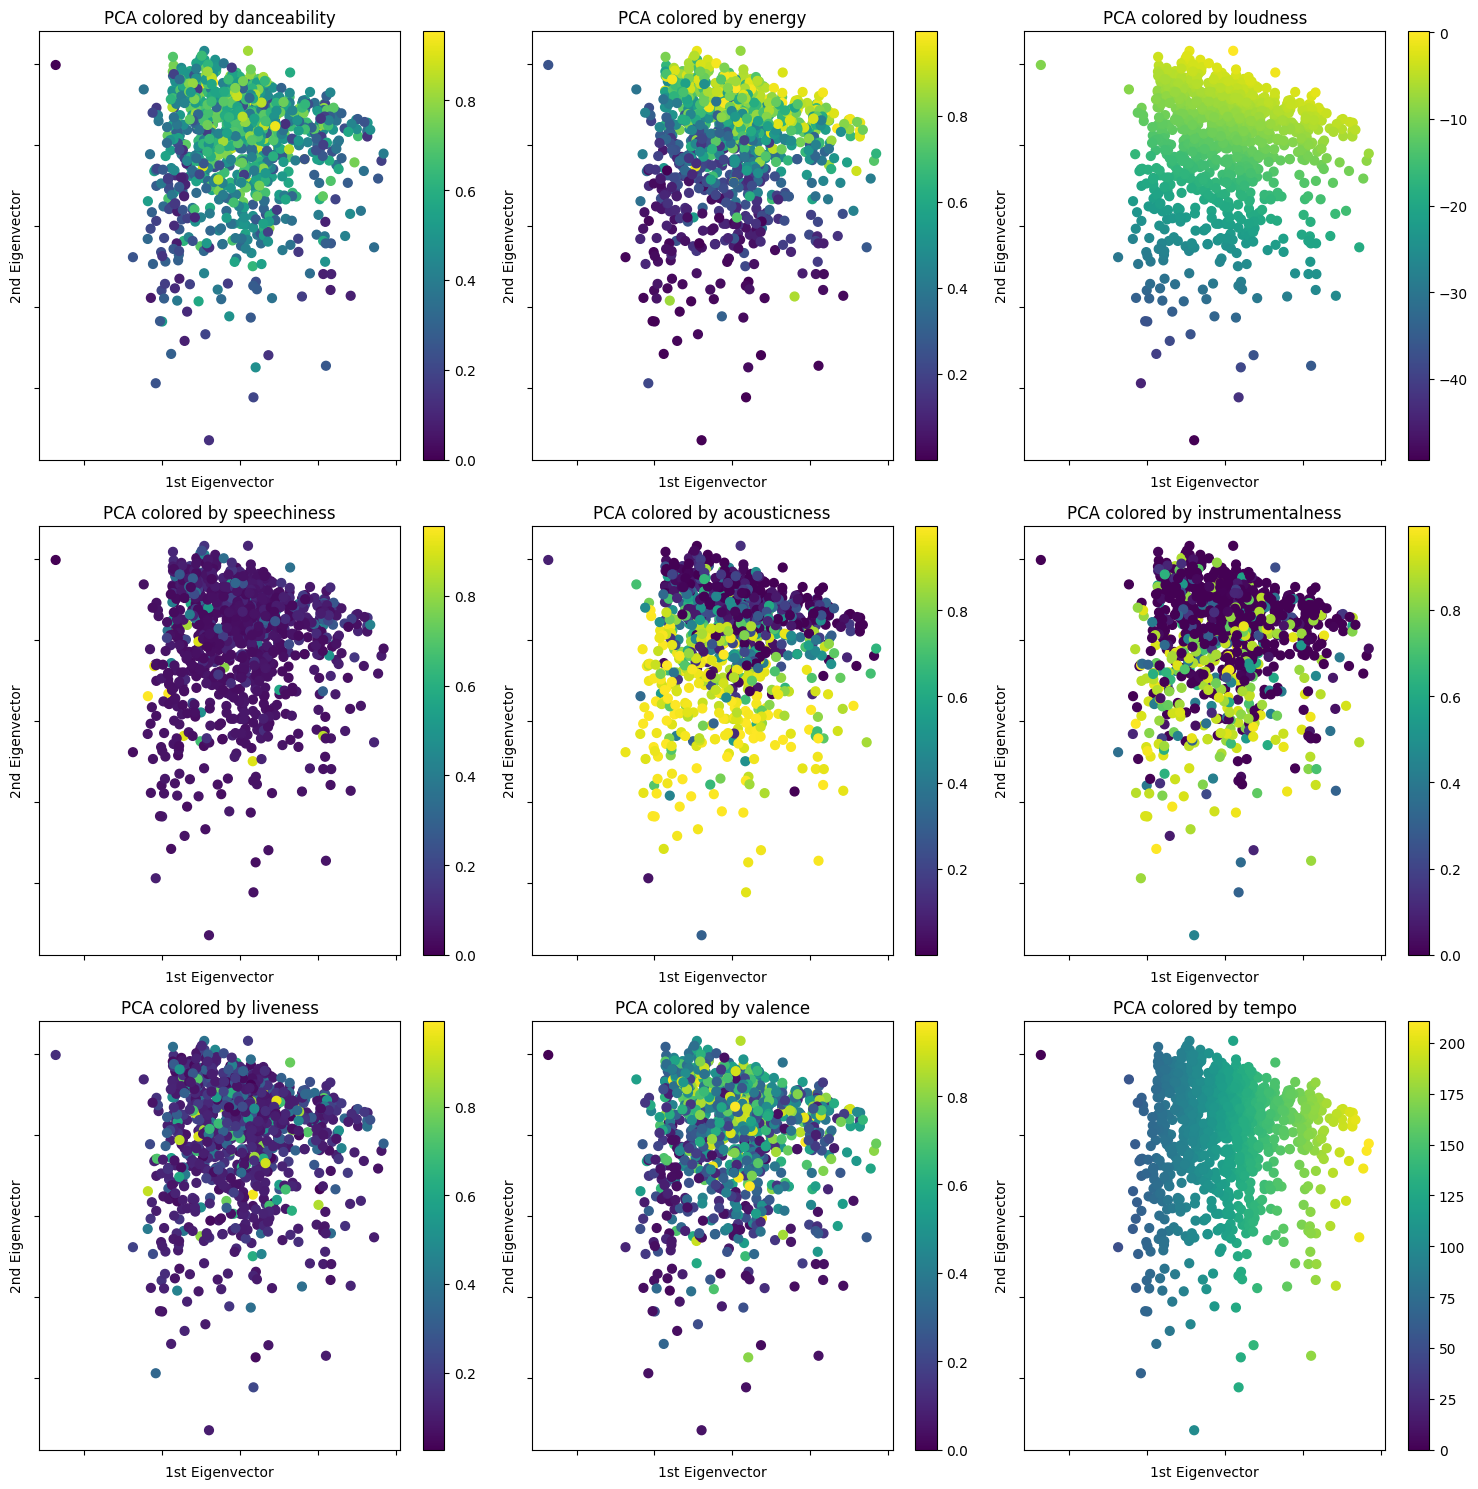

In [ ]:
#feature_of_interest = "energy"
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
X_reduced = PCA(n_components=2).fit_transform(reduced_df)

for i, feature in enumerate(features):
    ax = axes[i]
    scatter = ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        c=reduced_df[feature],
        s=40,
        cmap='viridis'
    )
    ax.set(
        title=f"PCA colored by {feature}",
        xlabel="1st Eigenvector",
        ylabel="2nd Eigenvector"
    )
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


/var/folders/9f/sb0fz4m93959ldp0sm0y2nz00000gn/T/ipykernel_9250/2311514279.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


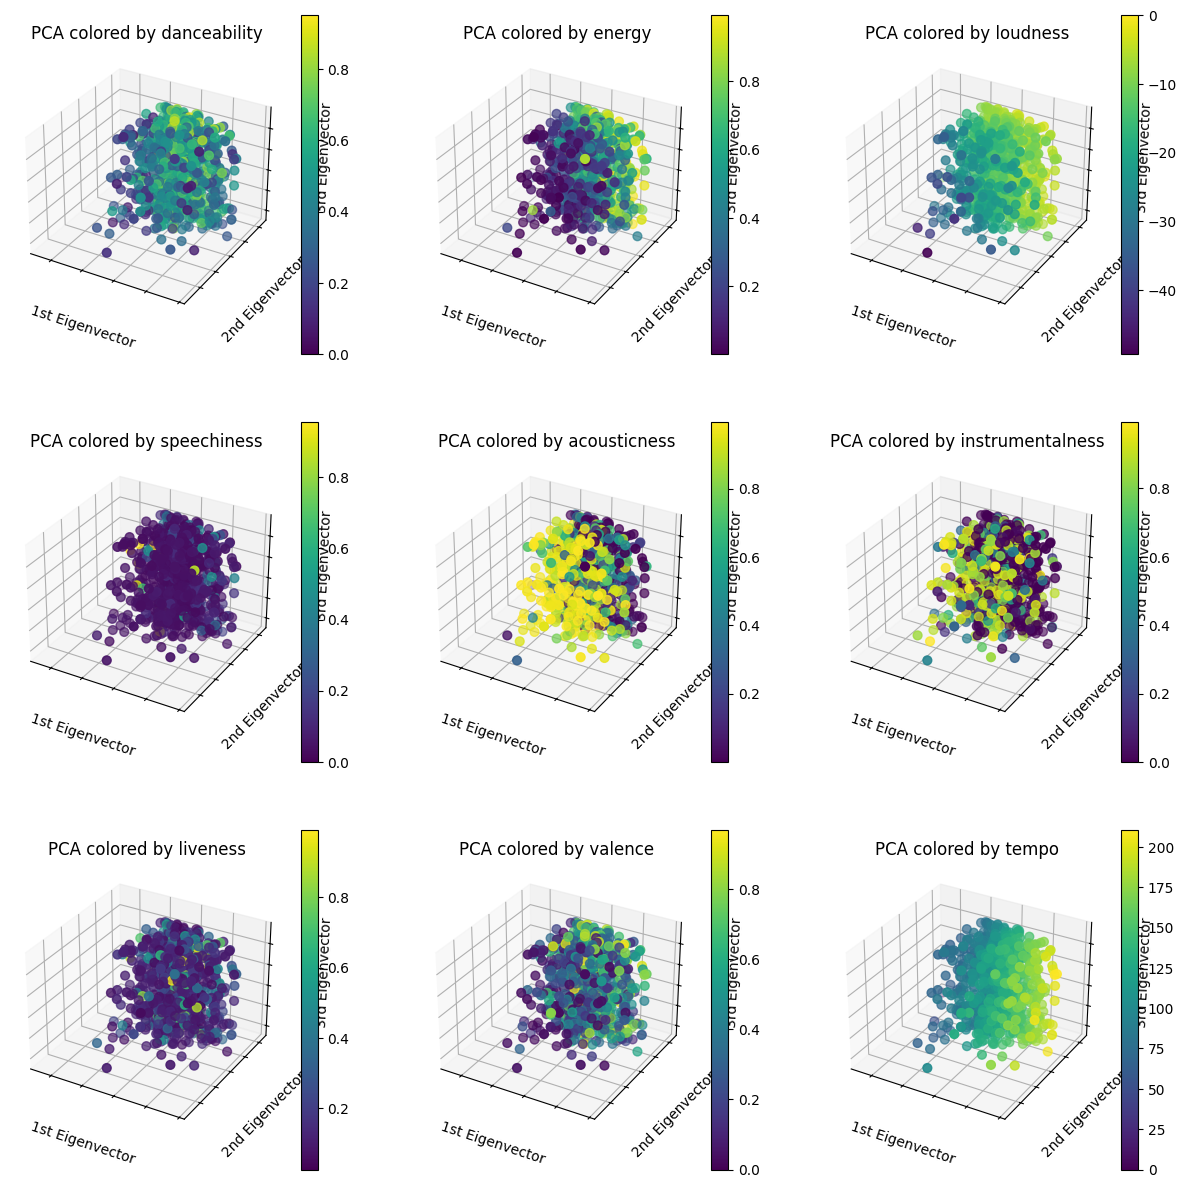

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Use the first three principal components
X_reduced_3d = PCA(n_components=3).fit_transform(reduced_df)

fig = plt.figure(figsize=(15, 15))
axes = [fig.add_subplot(3, 3, i + 1, projection='3d') for i in range(len(features))]

for i, feature in enumerate(features):
    ax = axes[i]
    scatter = ax.scatter(
        X_reduced_3d[:, 0],
        X_reduced_3d[:, 1],
        X_reduced_3d[:, 2],
        c=reduced_df[feature],
        s=40,
        cmap='viridis'
    )
    ax.set(
        title=f"PCA colored by {feature}",
        xlabel="1st Eigenvector",
        ylabel="2nd Eigenvector",
        zlabel="3rd Eigenvector"
    )
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


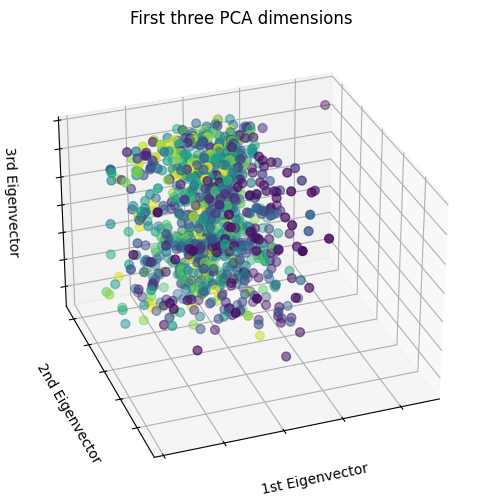

In [ ]:

fig = plt.figure(1, figsize=(8, 6))
#ax = fig.add_subplot(111)
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(reduced_df)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    #c=reduced_df["energy"],
    c=reduced_df["valence"],
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
#legend1 = ax.legend(
    #scatter.legend_elements()[0],
    #df["mode"].unique().tolist(),
    #loc="upper right",
    #title="Classes",
#)
#ax.add_artist(legend1)

plt.show()